## Are soccer referees more likely to give red cards to dark skin toned players than light skin toned players?

### Executive Summary

No, refs are not more likely to give red cards to dark skin-toned players than light skin-toned players. This was shown by comparing whether or not a player received any red-card, and if it was dependent on a light (0-0.7 skin-tone rating) or dark (0.8-1 skin-tone rating) as assessed with a Chi-squared test.
Likewise, the total number of red-cards for that players career was not dependent on skin-tone light vs. dark as assessed with a non-parametric Mann-Whiteny test. This test is analagous to a normal t-test.


Description of the data:

 playerShort 
short player ID

 player 
player name

 club
player club

 leagueCountry
country of player club (England, Germany, France, and Spain)

 birthday
player birthday

 height
player height (in cm)

 weight
player weight (in kg)

 position
detailed player position 

 games
number of games in the player-referee dyad

 victories
victories in the player-referee dyad

 ties
ties in the player-referee dyad

 defeats
losses in the player-referee dyad

 goals
goals scored by a player in the player-referee dyad

 yellowCards
number of yellow cards player received from referee

 yellowReds
number of yellow-red cards player received from referee

 redCards
number of red cards player received from referee

 photoID
ID of player photo (if available)

 rater1
skin rating of photo by rater 1 (5-point scale ranging from 'very light skin' to 'very dark skin')

 rater2
skin rating of photo by rater 2 (5-point scale ranging from 'very light skin' to 'very dark skin')

 refNum
unique referee ID number (referee name removed for anonymizing purposes)

 refCountry
unique referee country ID number (country name removed for anonymizing purposes)

 meanIAT
mean implicit bias score (using the race IAT) for referee country, higher values correspond to faster white | good, black | bad associations 

 nIAT
sample size for race IAT in that particular country

 seIAT
standard error for mean estimate of race IAT       

 meanExp
mean explicit bias score (using a racial thermometer task) for referee country, higher values correspond to greater feelings of warmth toward whites versus blacks

 nExp
sample size for explicit bias in that particular country

 seExp
standard error for mean estimate of explicit bias measure

### Key variables to focus on:
    
    1. 'redCards' the number of red cards given to that player, by a specific referee. There will be multiple entries for each player b/c there are multiple referees. This is our target variable, basically trying to discern how likely we are to get more redcards with darker skin.
    
    2. 'rater1' and 'rater2' = skin color rating 0= light, 1= dark. The hypothesis that a skin rating of 5 corresponds with more red cards.
    
    3. 'games' = number of games that the player and ref have played in the same game. It may be that a ref holds a grudge against a team and/or player.
    
    'IAT' features = Implicit Association Test for racial bias. While these ratings are important and may show us why certain refs are more prone to racial bias, that is not the main question. The question is DO REFS GIVE MORE RED CARDS TO PLAYERS WITH DARKER SKIN? not why? Therefore, I will not focus on these metrics right now.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the data
df_1=pd.read_csv('redcard_1.csv')
df_2=pd.read_csv('redcard_2.csv')

In [3]:
df_1.head()

,Unnamed: 0,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [4]:
df_2.head()

,Unnamed: 0,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,73014,kevin-vogt,Kevin Vogt,FC Augsburg,Germany,23.09.1991,194.0,80.0,Defensive Midfielder,1,...,0.00,1604,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
1,73015,lkay-guendogan,İlkay Gündoğan,Borussia Dortmund,Germany,24.10.1990,180.0,79.0,Attacking Midfielder,1,...,0.25,1604,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
2,73016,lukas-schmitz,Lukas Schmitz,Werder Bremen,Germany,13.10.1988,184.0,80.0,Left Fullback,1,...,0.50,1604,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
3,73017,manuel-schmiedebach,Manuel Schmiedebach,Hannover 96,Germany,05.12.1988,170.0,70.0,Defensive Midfielder,2,...,0.25,1604,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
4,73018,marcel-schmelzer,Marcel Schmelzer,Borussia Dortmund,Germany,22.01.1988,181.0,74.0,Left Fullback,2,...,0.00,1604,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225


## 1. Explore and clean the data

Merge the 2 datasets together, as they are the same but contain different players

In [5]:
df=pd.concat([df_1,df_1])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146028 entries, 0 to 73013
Data columns (total 29 columns):
Unnamed: 0       146028 non-null int64
playerShort      146028 non-null object
player           146028 non-null object
club             146028 non-null object
leagueCountry    146028 non-null object
birthday         146028 non-null object
height           145762 non-null float64
weight           143890 non-null float64
position         128422 non-null object
games            146028 non-null int64
victories        146028 non-null int64
ties             146028 non-null int64
defeats          146028 non-null int64
goals            146028 non-null int64
yellowCards      146028 non-null int64
yellowReds       146028 non-null int64
redCards         146028 non-null int64
photoID          125294 non-null object
rater1           125294 non-null float64
rater2           125294 non-null float64
refNum           146028 non-null int64
refCountry       146028 non-null int64
Alpha_3          

Check for NA values

In [6]:
na_list=df.isna().sum()
na_list/len(df) # percentage

Unnamed: 0       0.000000
playerShort      0.000000
player           0.000000
club             0.000000
leagueCountry    0.000000
birthday         0.000000
height           0.001822
weight           0.014641
position         0.120566
games            0.000000
victories        0.000000
ties             0.000000
defeats          0.000000
goals            0.000000
yellowCards      0.000000
yellowReds       0.000000
redCards         0.000000
photoID          0.141986
rater1           0.141986
rater2           0.141986
refNum           0.000000
refCountry       0.000000
Alpha_3          0.000000
meanIAT          0.001329
nIAT             0.001329
seIAT            0.001329
meanExp          0.001329
nExp             0.001329
seExp            0.001329
dtype: float64

If there is no photoID, there was no way for the judges to rate their skin tone. Therefore anything with missing photoID and rater scores will be removed.

In [7]:
df=df.dropna(subset=['photoID', 'rater1', 'rater2'])

How many different countries are the refs from?

In [8]:
len(set(df.refCountry))

133

Since these are all numeric to not show the actual country, we cannot group them by regions. But, we only have 4 countries for the soccer team locations, and 133 unique countries the refs could be from.

#### Check that the values are within expected ranges

In [9]:
df.iloc[:,0:22].describe()

,Unnamed: 0,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry
count,125294.000000,125254.000000,124590.000000,125294.000000,125294.000000,125294.000000,125294.000000,125294.000000,125294.000000,125294.000000,125294.000000,125294.000000,125294.000000,125294.000000,125294.000000
mean,36719.619391,181.935124,76.200995,2.967612,1.328332,0.703497,0.935783,0.347982,0.421233,0.013744,0.012738,0.262598,0.301399,730.865006,25.457037
std,21106.609563,6.771395,7.111773,3.415901,1.820663,1.104469,1.378129,0.944773,0.845150,0.118464,0.113838,0.290894,0.288370,437.329957,26.870779
min,0.000000,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,18700.250000,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,367.000000,3.000000
50%,36955.000000,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,655.000000,8.000000
75%,54912.750000,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,1096.000000,44.000000
max,73013.000000,203.000000,100.000000,47.000000,29.000000,13.000000,17.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,1604.000000,137.000000


This all looks good. 

## 2. Feature Engineering

Now, since we have 2 ratings for skin-tone we need to know how to handle differences between raters. My first idea is to simply average the rater1 and rater2 values. Create a new feature 'avg_rate'


In [10]:
df['avg_rate']=(df.rater1+ df.rater2)/2

Text(0, 0.5, 'Frequency')

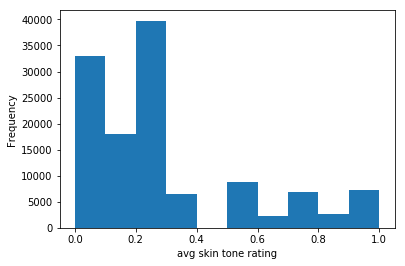

In [11]:
plt.hist(df['avg_rate'])
plt.xlabel("avg skin tone rating")
plt.ylabel("Frequency")

While skin tone may influence refs, it may also be a threshold issue where a ref sees 'light' and 'dark', not a value of .25 or .5. Therefore, for the darkest skin-tone I will create a new feature called 'dark', where it will be 1 if that person gets a rating equal to or above 0.8, and 0 for all other values.

In [12]:
df['dark']=np.where(df['avg_rate']>=.8, 1, 0)

Text(0.5, 6.79999999999999, 'number of redcards given to a player by a specific ref')

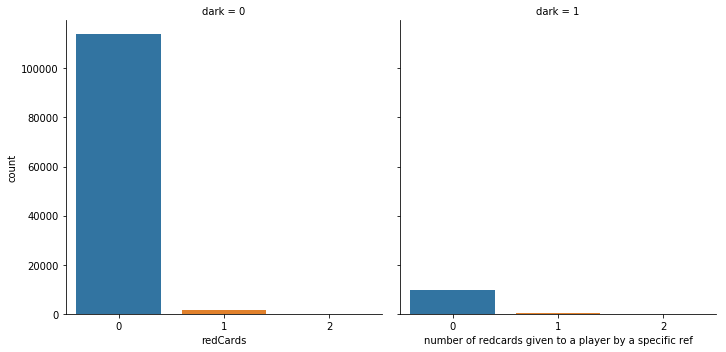

In [13]:
sns.catplot("redCards", col="dark",data=df, kind="count")

plt.xlabel("number of redcards given to a player by a specific ref")

While it would be great to keep all the individual ref-player interactions, I first want to group everything by player and just see if the total number of redcards changes with skin-tone. Create a new dataframe grouped by player, where redcards are the total redcards received by that player.

In [14]:
df_player=df.groupby(['player','playerShort','club','leagueCountry', 'position', 'height', 'weight'], as_index=False).agg({'redCards': 'sum',
                                                            'yellowReds':'sum',
                                                           'games': 'sum',
                                                            'victories': 'sum',
                                                            'defeats':'sum',
                                                           'avg_rate': 'mean',
                                                            'dark':'mean'})

There are 'yellowRed' and 'redCards' features, but we want to know about total redcards. So, we will combine these 2 features together to get a total redcard feature.

In [29]:
df_player['total_reds']=df_player.redCards+df_player.yellowReds

In [30]:
df_player.head()

,player,playerShort,club,leagueCountry,position,height,weight,redCards,yellowReds,games,victories,defeats,avg_rate,dark,total_reds
0,Adriano,adriano_24,FC Barcelona,Spain,Left Midfielder,172.0,67.0,4,2,540,320,132,0.250,0,6
1,Adrián,adrian_2,Atlético Madrid,Spain,Center Forward,183.0,73.0,0,0,450,216,136,0.125,0,0
2,Adrián,adrian_7,SD Compostela,Spain,Goalkeeper,188.0,82.0,0,0,42,10,10,0.250,0,0
3,Adrián Colunga,adrian-colunga,Getafe CF,Spain,Center Forward,171.0,69.0,0,2,280,88,122,0.250,0,2
4,Aduriz,aduriz,Athletic Bilbao,Spain,Center Forward,182.0,78.0,8,4,500,206,174,0.250,0,12


Scatterplot of height vs total number of redcards

Text(27.056829427083336, 0.5, 'total number of redcars for that player')

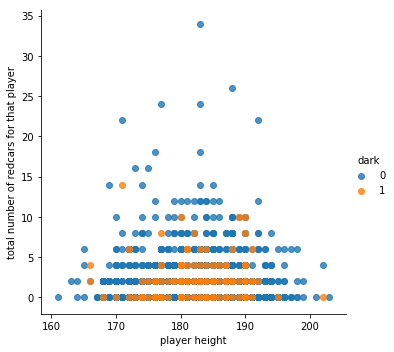

In [31]:
sns.lmplot(x='height', y='total_reds', data=df_player, fit_reg=False, hue='dark')
plt.xlabel('player height')
plt.ylabel('total number of redcars for that player')

Text(27.056829427083336, 0.5, 'total number of redcars for that player')

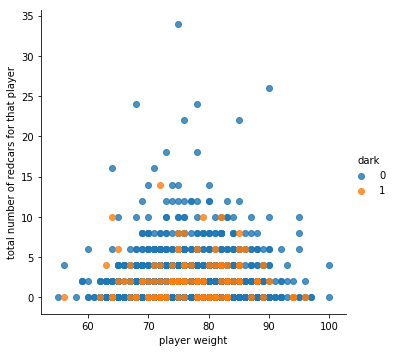

In [32]:
sns.lmplot(x='weight', y='total_reds', data=df_player, fit_reg=False, hue='dark')
plt.xlabel('player weight')
plt.ylabel('total number of redcars for that player')

Plot total number of redcars vs total number of games played

Text(27.056829427083336, 0.5, 'total number of redcars for that player')

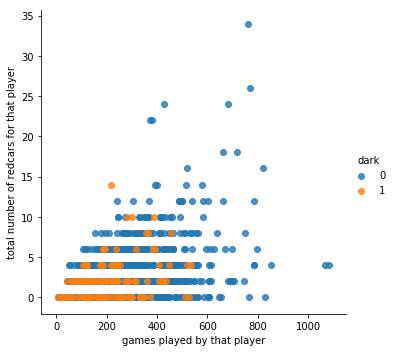

In [33]:
sns.lmplot(x='games', y='total_reds', data=df_player, fit_reg=False, hue='dark')
plt.xlabel('games played by that player')
plt.ylabel('total number of redcars for that player')

Interestingly, there are no dark skin-toned players with more than 600 games. It appears players that stay longer in the league are not as dark overall.

Create a variable 'red_yes' which is a binary variable that is 1 if the player has ever received a red card, and 0 if the player has not.

In [35]:
df_player['red_yes']=np.where(df_player.total_reds>0, 1,0)

Text(0, 0.5, 'frequency of players who did or did not get a red card')

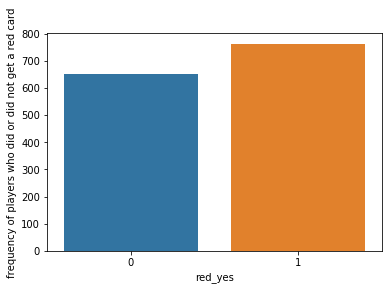

In [38]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='red_yes', data=df_player) #counts up the frequency in each category
plt.ylabel('frequency of players who did or did not get a red card') 

## Is the data balanced?

are there equal numbers of light and dark players?

In [19]:
df_group_dark=df_player.groupby('dark', as_index=False).count()

Text(0.5, 0, "Skintone, 0='light', 1='dark'")

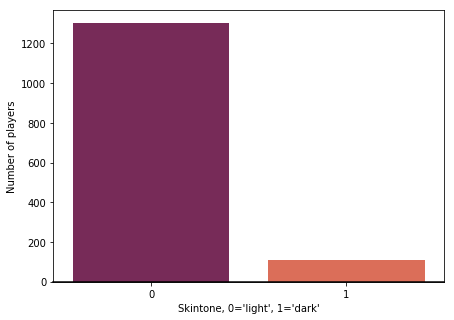

In [20]:

fig, ax1  = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
#fig.canvas.draw()
sns.barplot(x=df_group_dark['dark'], y=df_group_dark['player'], palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Number of players")
ax1.set_xlabel("Skintone, 0='light', 1='dark'")

No, right away we see there are many more light skin-toned players.

What about the players who rerceive redcards? is there an equal distribution of those who do and do not receive them? or is it an equal split for the light and dark skin-tones?

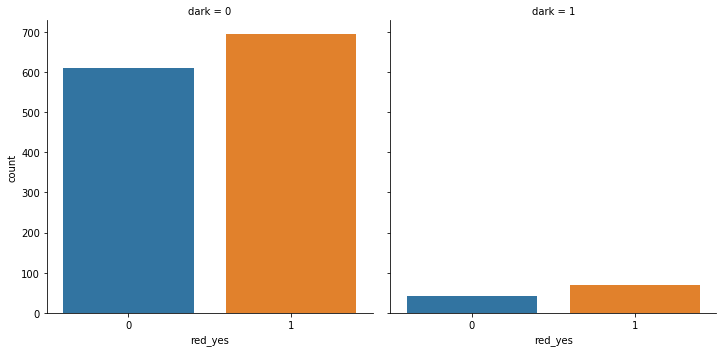

In [37]:
sns.catplot("red_yes", col="dark",data=df_player, kind="count")

When we simply say who did and did not receive a red card, it appears the split is approximately equal for the light and dark skin-tone players.

Is country of the soccer league important?

/home/natalie/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


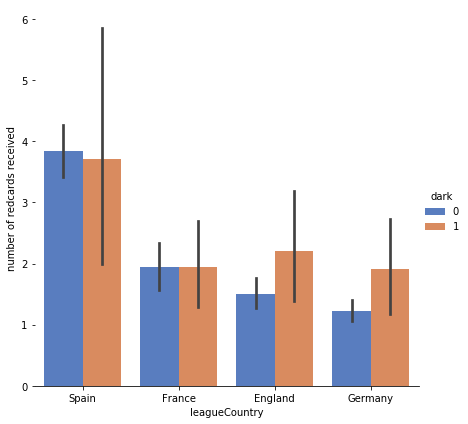

In [34]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="leagueCountry", y="total_reds", hue="dark", data=df_player,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("number of redcards received")

It appears that the location of the league may have some impact on the number of redcards given to light and dark skin-toned players. Germany and England seem to have more of a bias towards giving red cards to dark skin-toned players.

# 3. Does a player's skin-tone affect wheather or not they receive a red card?

Start with a simple Chi-square test to see if the yes/no redcard distributions of the light and dark skin-toned players are independent. If they are independent, then we would conclude that skin-tone does not affect the refs giving out redcars.

In [46]:
#Create a contingency table which simply sums up the yes/no tallies for the light and dark skin-toned players
group_redyes=df_player.groupby(['red_yes', 'dark'], as_index=False)['player'].count()

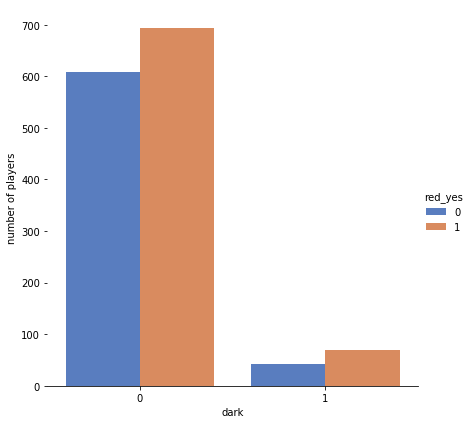

In [53]:
g = sns.catplot(x="dark", y="player", hue="red_yes", data=group_redyes,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("number of players")

This is showing that if a player had light skin-tone (0) or dark (1) the ratio between players who do and do not receive a red-card is approximately the same.

In [49]:
c_tab=pd.crosstab(df_player.red_yes > 0, df_player.dark > 0)
c_tab

dark,False,True
red_yes,,
False,609,43
True,694,69


In [50]:
from scipy.stats import chi2_contingency
chi2_contingency(c_tab)

(2.5648518623027297,
 0.1092627921379188,
 1,
 array([[600.39293286,  51.60706714],
        [702.60706714,  60.39293286]]))

These results suggest that the p-value of 0.10 is not significant, and we would not reject the null hypothesis that whether or not a player received any redcards is independent of their skin-tone being light or dark. The p-value of 0.10 indicates there is an approximately 10% chance we would see this result due to random chance and not because of a specific trend in this data.

The array from the chi-square output is the expected values if getting a red-card was independent of race. For the dark skin-toned column (column 2), this means we would expect 51 people to NOT get red-cards and 60 people to get redcars. In our observed data, we got 43 people who did NOT get red-cards, and 69 peopple who did. Thus, our observed data is not that far off from the idealized case, and we are not confident saying that our observed data deviates from the expected scenario when race does not matter.

From this result, I would say "NO race does not influence wheater or not a player gets any red-cards in his career".

If we wanted to get an idea of if a player is more likely to get more redcards (a higher number) if they are light or dark skined, we could run a t-test testing the difference between the 2 groups.
This test assumes the number of redcards is approximately normally distributed for both groups, let's check.

Text(0, 0.5, 'Frequency for light players')

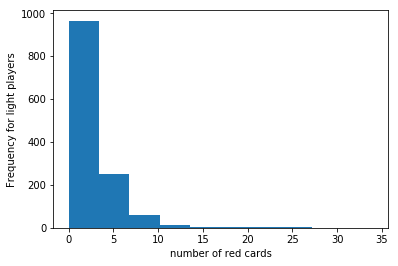

In [54]:
plt.hist(df_player['total_reds'][df_player.dark==0])
plt.xlabel("number of red cards")
plt.ylabel("Frequency for light players")

Text(0, 0.5, 'Frequency for dark players')

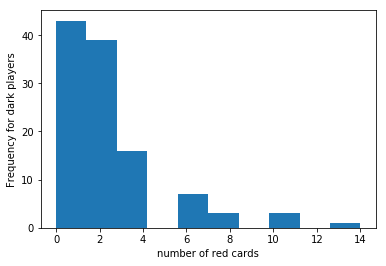

In [55]:
plt.hist(df_player['total_reds'][df_player.dark==1])
plt.xlabel("number of red cards")
plt.ylabel("Frequency for dark players")

Neither of these are normally distributed, and because we have 0 values a log-transformation will not work. Let's use a non-parametric test that is simmilar to the t-test, a Mann-whitney rank-sum test.

The mann-whitney test is also fine to use on unbalanced data, which we have here.


In [57]:
from scipy.stats import mannwhitneyu

light=df_player['total_reds'][df_player.dark==0]
dark=df_player['total_reds'][df_player.dark==1]

stat, p = mannwhitneyu(light, dark)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=68377.500, p=0.119


Again, the p-value of 0.12 indicates there is no reason to reject the null hypothesis that these two groups (light and dark) have the same distriibution of number of red-cards received by a player.

Thus, I would say that "skin tone does not affect the total number of red-cards a player receives".

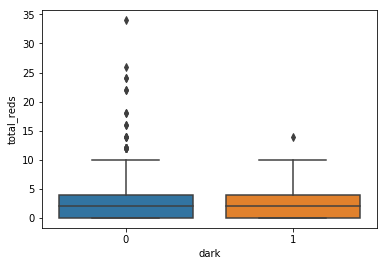

In [58]:
sns.boxplot(data=df_player, x='dark', y='total_reds')

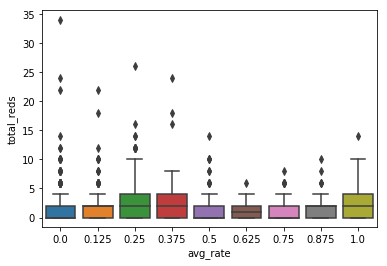

In [60]:
sns.boxplot(data=df_player, x='avg_rate', y='total_reds')

This plot shows that the number of red-cards received by a player does not depend on light vs dark, and likewise a darker skin-tone rating of 1 does not have a higher number of red-cards than the lighter skin-tones.